In [375]:
import numpy as np

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import time
import numpy as np
import matplotlib.pyplot as plt
from itertools import zip_longest
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from itertools import zip_longest

In [420]:
class LinearRegression:
    
    def __init__(self):
        try:
            init_range = 0.1
            random_weigths = np.random.randint(30)
            self.history = []
            self.weigths_his = []
            self.biases_his = []
            self.epoch_his = []
            self.loss_his = []
            self.x = data_x
        except:
            print("function constutor")
            
        self.weigths = np.random.uniform(low = -init_range, high = init_range, size=(2, 1))
        self.biases = np.random.uniform(low = -init_range, high = init_range, size=(1, 1))

        #self.weigths = np.random.uniform(-4, 4)#เข้า2 ออก 1
        #self.biases = np.random.uniform(-4, 4)#เข้าออกเท่ากับขาเข้า


        #print(f"shape weigths {self.weigths.shape} shape biases {self.biases.shape}")
        
        
    def linearRun(self, datas):
                                                               
        #example 10000 x 2 * 2*1
            
        y_predic =   np.dot(datas, self.weigths) + self.biases
        #y_predic = self.weights * data + self.biases
        
        return y_predic
    
    def updataHistory(self, loss, weigths, biases, epoch):
        
        self.loss_his.append(loss)
        self.weigths_his.append(weigths)
        self.biases_his.append(biases)
        self.epoch_his.append(epoch)
    
    def lossDerivative(self):
        """
        การหาอนุพัน
        Return :
            dw: dl /dw , ของค่า mean
            db: dl / db
        """
        print(f"lossDerive {self.x.shape}")
        #dw = np.mean((self.y_predic - self.y) * self.x)
        dw = np.mean(self.y_predic - self.y)
        db = np.mean(self.y_predic - self.y)
        
        return dw, db
    
    def fit(self, data_x, data_y, max_epoch):
        
        self.x = data_x
        self.y = data_y
        
        p_loss = 0
        for epoch in range(max_epoch):
            self.y_predic = self.linearRun(self.x)

            self.loss = LossFunction().meansSquaredError(self.y, self.y_predic)
            self.updataHistory(self.loss, self.weigths, self.biases, i)

            self.dw, self.db = self.lossDerivative()
            #Updata weigth
            self.weigths, self.biases = Optimizer(learning_rate = 0.3,
                                                  w = self.weigths,
                                                  b = self.biases,
                                                  dw = self.dw,
                                                  db = self.db
                                                 ).gradientDescent()


            if np.abs(p_loss - self.loss) < 1e-6:

                self.loss = LossFunction().meansSquaredError(self.y, self.y_predic)
                self.weigths, self.biases = Optimizer(learning_rate = 0.3,
                                                      w = self.weigths,
                                                      b = self.biases,
                                                      dw = self.dw,
                                                      db = self.db).gradientDescent()


            self.loss = LossFunction().meansSquaredError(self.y, self.y_predic)
            self.updataHistory(self.loss, self.weigths, self.biases, i)

            p_loss = self.loss
            #if epoch % 10 == 0:
            print(f"epoch {epoch} Loss {self.loss}")

            self.epoch_his.append(i)
            self.weigths_his.append(self.weigths)
            self.biases_his.append(self.biases)



In [421]:
class Optimizer:
    def __init__(self, learning_rate = None, w = None, b = None, dw = None, db = None):
        self.lr = learning_rate
        self.weigths = w
        self.biases = b
        self.dw = dw
        self.db = db
        
    def gradientDescent(self):     
        try:
            self.weigths = self.weigths - (self.lr * self.dw)
            self.biases = self.biases - (self.lr * self.db)
            print(f'GradientDescent shape weigths {self.weigths}')
        except:
            print("optimizer error")
        #print(f'{self.weigths.shape} \n{self.biases.shape}')
        return self.weigths, self.biases
    
        

In [422]:
class LossFunction(object):
    
    def meansSquaredError(self, y_true, y_predic):
        
        loss = 0.5 * np.mean((y_predic - y_true)**2)
        
        return loss
                    

In [423]:
import matplotlib.pyplot as plt
np.random.seed(219)
N = 200
a = 4
b = -3
low = -3.0
high = 4.0
data_x = np.random.uniform(low=low, high=high, size=N)
data_y = np.zeros(N)
for i, x in enumerate(data_x):
  scale = - (x - low) * (x - high) / 3. + 1.5
  data_y[i] = a * x + b + np.random.normal(loc=0.0, scale=scale, size=1)

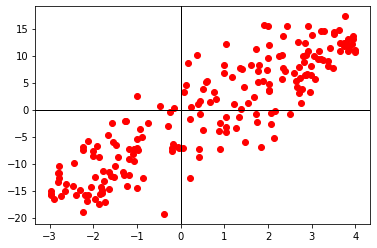

In [424]:
plt.plot(data_x, data_y, 'ro')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.show()

In [425]:
#Generate Date to train
import numpy as np
observation = 1000 #ตัวเเปรนี้จะบอกขนาดของข้อมูล
#np.random.uniform(low, high, size) self.weigths, self.biases = Optimizer(learning_rate = 0.3,
                                            

xs = np.random.uniform(low = -10, high = 10, size = (observation, 1))
#xs 1000x1
zs = np.random.uniform(low = -10, high = 10, size = (observation, 1))
#zs 1000x1
inputs = np.column_stack((xs, zs))# ตัวเเปรนี้รวม xs, zs เข้าด้วยกัน

# ค่า input k = 2
# จำนวนobservation n = 1000

#Create date target 
#targets = f(x,z) = 2*x - 3*z +5  + noise
#2* คือ w1, 3* คือ w2, 5 คือ bias
noise = np.random.uniform(-1, 1, (observation,1 ))

targets = 2*xs - 3*zs + 5 + noise
# ค่าoutput m = 1

init_range = 0.1
learning_rate = 0.01
n = 1000
k = 2
m = 1
#weights = np.random.uniform(low = -init_range, high = init_range, size=(2, 1))
#weights = np.random.uniform(low = -init_range, high = init_range, size=(k, m))
#biases = np.random.uniform(low = -init_range, high = init_range, size = (1, 1))
#biases = np.random.uniform(low = -init_range, high = init_range, size = (1, m))

In [426]:
inputs.shape

(1000, 2)

In [427]:
targets.shape

(1000, 1)

In [428]:
# using data_x, data_y
X = np.concatenate((data_x.reshape(N, 1), np.ones(N).reshape(N, 1)), axis=1)
Y = data_y.reshape(N, 1)

In [429]:
print(f'inputs, targets')

inputs, targets


In [430]:
model = LinearRegression()
model.fit(inputs, targets, max_epoch = 2)

lossDerive (1000, 2)
GradientDescent shape weigths [[1.37699602]
 [1.34851139]]
epoch 0 Loss 213.51982609731886
lossDerive (1000, 2)
GradientDescent shape weigths [[2.27767938]
 [2.24919474]]
epoch 1 Loss 308.6380338089732
